In [1]:
from popsborder.scenarios import run_scenarios
from popsborder.inputs import load_configuration, load_scenario_table
from popsborder.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("data")
basic_config = load_configuration(datadir / "base_config.yml")
scenario_table = load_scenario_table(datadir / "scenarios_long.csv")

In [4]:
results = run_scenarios(
    config=basic_config,
    scenario_table=scenario_table,
    seed=42,
    num_simulations=2,
    num_consignments=10,
)

Running scenario: clustered_10
Running scenario: clustered_12
Running scenario: clustered_14
Running scenario: clustered_16
Running scenario: clustered_09
Running scenario: clustered_11
Running scenario: clustered_13
Running scenario: clustered_15
Running scenario: clustered_02
Running scenario: clustered_04
Running scenario: clustered_06
Running scenario: clustered_08
Running scenario: clustered_01
Running scenario: clustered_03
Running scenario: clustered_05
Running scenario: clustered_07
Running scenario: clustered_35
Running scenario: clustered_36
Running scenario: clustered_39
Running scenario: clustered_40
Running scenario: clustered_43
Running scenario: clustered_44
Running scenario: clustered_47
Running scenario: clustered_48
Running scenario: clustered_34
Running scenario: clustered_38
Running scenario: clustered_42
Running scenario: clustered_46
Running scenario: clustered_33
Running scenario: clustered_37
Running scenario: clustered_41
Running scenario: clustered_45
Running 

In [5]:
df = save_scenario_result_to_pandas(
    results,
    config_columns=[
        "name",
        "consignment_name",
        "inspection_name",
        "consignment/parameter_based/boxes/min",
        "consignment/parameter_based/boxes/max",
        "consignment/items_per_box/default",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/within_box_pct",
        "inspection/cluster/cluster_selection",
    ],
    result_columns=[
        "missing",
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_items_inspected_detection",
        "pct_contaminant_unreported_if_detection",
    ],
)

In [6]:
df['consignment_name'] = pd.Categorical(df['consignment_name'])
consignment_order = ["contamination_5", "contamination_10", "contamination_25", "small", "large", "maritime", "clustered", "clustered_small", "clustered_large"]
df['consignment_name'] = df['consignment_name'].cat.reorder_categories(consignment_order, ordered=True)
df

,name,consignment_name,inspection_name,consignment/boxes/min,consignment/boxes/max,consignment/items_per_box/default,contamination/contamination_rate/parameters,contamination/arrangement,inspection/unit,inspection/sample_strategy,...,max_missed_contamination_rate,avg_missed_contamination_rate,max_intercepted_contamination_rate,avg_intercepted_contamination_rate,avg_boxes_opened_completion,avg_boxes_opened_detection,avg_items_inspected_completion,avg_items_inspected_detection,pct_items_inspected_detection,pct_contaminant_unreported_if_detection
0,clustered_10,clustered,boxes 0.01 hypergeometric random,5,25,200,"[1, 80]",clustered,box,hypergeometric,...,NaN,NaN,0.018177,0.007520,15.95,2.05,3190.0,410.0,12.959031,0.00000
1,clustered_12,clustered,boxes 0.05 hypergeometric random,5,25,200,"[1, 80]",clustered,box,hypergeometric,...,NaN,NaN,0.018242,0.007540,14.55,1.80,2910.0,360.0,12.645243,0.00000
2,clustered_14,clustered,boxes 0.1 hypergeometric random,5,25,200,"[1, 80]",clustered,box,hypergeometric,...,0.010500,0.010500,0.018186,0.007436,11.10,2.50,2220.0,500.0,19.696030,0.00000
3,clustered_16,clustered,boxes 0.25 hypergeometric random,5,25,200,"[1, 80]",clustered,box,hypergeometric,...,0.013576,0.011662,0.017649,0.006498,7.55,3.30,1510.0,660.0,24.203297,0.00000
4,clustered_09,clustered,boxes 0.01 hypergeometric convenience,5,25,200,"[1, 80]",clustered,box,hypergeometric,...,NaN,NaN,0.018095,0.007498,14.20,1.80,2840.0,360.0,12.176101,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,small_30,small,items 25% random,1,3,200,"[1, 80]",random,item,proportion,...,0.030000,0.010301,NaN,NaN,2.20,2.20,8.8,8.8,2.000000,0.00000
428,small_17,small,items 2% convenience,1,3,200,"[1, 80]",random,item,proportion,...,0.025000,0.012396,0.016250,0.007917,1.00,1.00,8.2,5.1,1.236905,60.25641
429,small_21,small,items 5% convenience,1,3,200,"[1, 80]",random,item,proportion,...,0.025000,0.012396,0.016250,0.007917,1.00,1.00,8.2,5.1,1.236905,60.25641
430,small_25,small,items 10% convenience,1,3,200,"[1, 80]",random,item,proportion,...,0.025000,0.012396,0.016250,0.007917,1.00,1.00,8.2,5.1,1.236905,60.25641


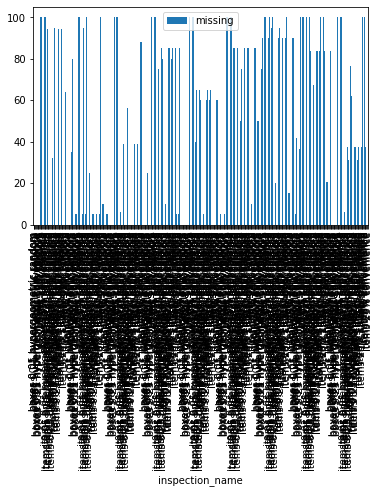

In [7]:
df.plot(kind="bar", x="inspection_name", y="missing")

In [8]:
#df["consignment"] = df.apply(lambda row: re.sub("_[0-9]+$", "", row["name"]), axis = 1)

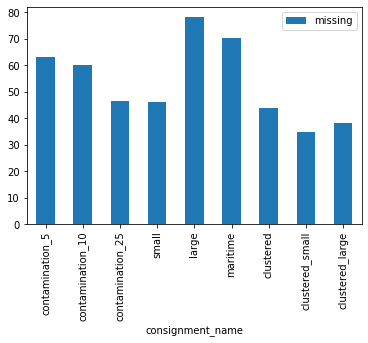

In [9]:
df.groupby("consignment_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="consignment_name", y="missing")

Text(0.5, 1.0, 'Avg percent contaminated consignments missed by inspection')

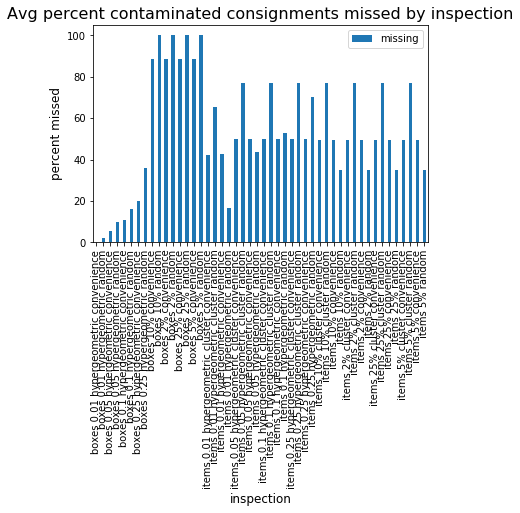

In [10]:
df.groupby("inspection_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="inspection_name", y="missing")
plt.xlabel("inspection", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg percent contaminated consignments missed by inspection", size=16)

In [11]:
inspections_vs_consignments = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["missing"])
inspections_vs_consignments

missing  \
consignment_name                              contamination_5    
inspection_name                                                  
boxes 0.01 hypergeometric convenience                      0.0   
boxes 0.01 hypergeometric random                           0.0   
boxes 0.05 hypergeometric convenience                      0.0   
boxes 0.05 hypergeometric random                           5.0   
boxes 0.1 hypergeometric convenience                       5.0   
boxes 0.1 hypergeometric random                            5.0   
boxes 0.25 hypergeometric convenience                     30.0   
boxes 0.25 hypergeometric random                          45.0   
boxes 10% convenience                                    100.0   
boxes 10% random                                         100.0   
boxes 2% convenience                                     100.0   
boxes 2% random                                          100.0   
boxes 25% convenience                                    100.0   
boxes 25% random                                         100.0   
boxes 5% convenience                                     100.0   
boxes 5% random                                          100.0   
items 0.01 hypergeometric cluster convenience             75.0   
items 0.01 hypergeometric cluster random                  80.0   
items 0.01 hypergeometric convenience                     75.0   
items 0.01 hypergeometric random                           0.0   
items 0.05 hypergeometric cluster convenience             85.0   
items 0.05 hypergeometric cluster random                  85.0   
items 0.05 hypergeometric convenience                     85.0   
items 0.05 hypergeometric random                          10.0   
items 0.1 hypergeometric cluster convenience              85.0   
items 0.1 hypergeometric cluster random                   85.0   
items 0.1 hypergeometric convenience                      85.0   
items 0.1 hypergeometric random                           25.0   
items 0.25 hypergeometric cluster convenience             85.0   
items 0.25 hypergeometric cluster random                  85.0   
items 0.25 hypergeometric convenience                     85.0   
items 0.25 hypergeometric random                          50.0   
items 10% cluster convenience                             85.0   
items 10% cluster random                                  85.0   
items 10% convenience                                     85.0   
items 10% random                                          10.0   
items 2% cluster convenience                              85.0   
items 2% cluster random                                   85.0   
items 2% convenience                                      85.0   
items 2% random                                           10.0   
items 25% cluster convenience                             85.0   
items 25% cluster random                                  85.0   
items 25% convenience                                     85.0   
items 25% random                                          10.0   
items 5% cluster convenience                              85.0   
items 5% cluster random                                   85.0   
items 5% convenience                                      85.0   
items 5% random                                           10.0   

                                                                \
consignment_name                              contamination_10   
inspection_name                                                  
boxes 0.01 hypergeometric convenience                      0.0   
boxes 0.01 hypergeometric random                           0.0   
boxes 0.05 hypergeometric convenience                      0.0   
boxes 0.05 hypergeometric random                           0.0   
boxes 0.1 hypergeometric convenience                       0.0   
boxes 0.1 hypergeometric random                            0.0   
boxes 0.25 hypergeometric convenience                     20.0   
boxes 0.25 hypergeometric ra

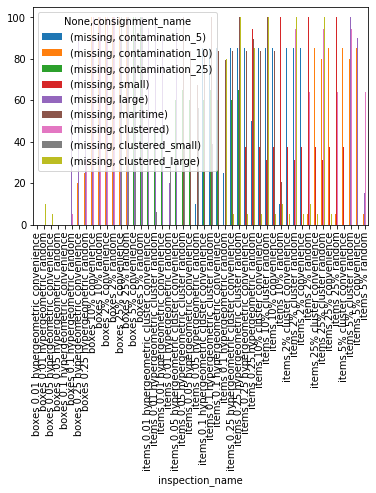

In [12]:
inspections_vs_consignments.plot(kind="bar")

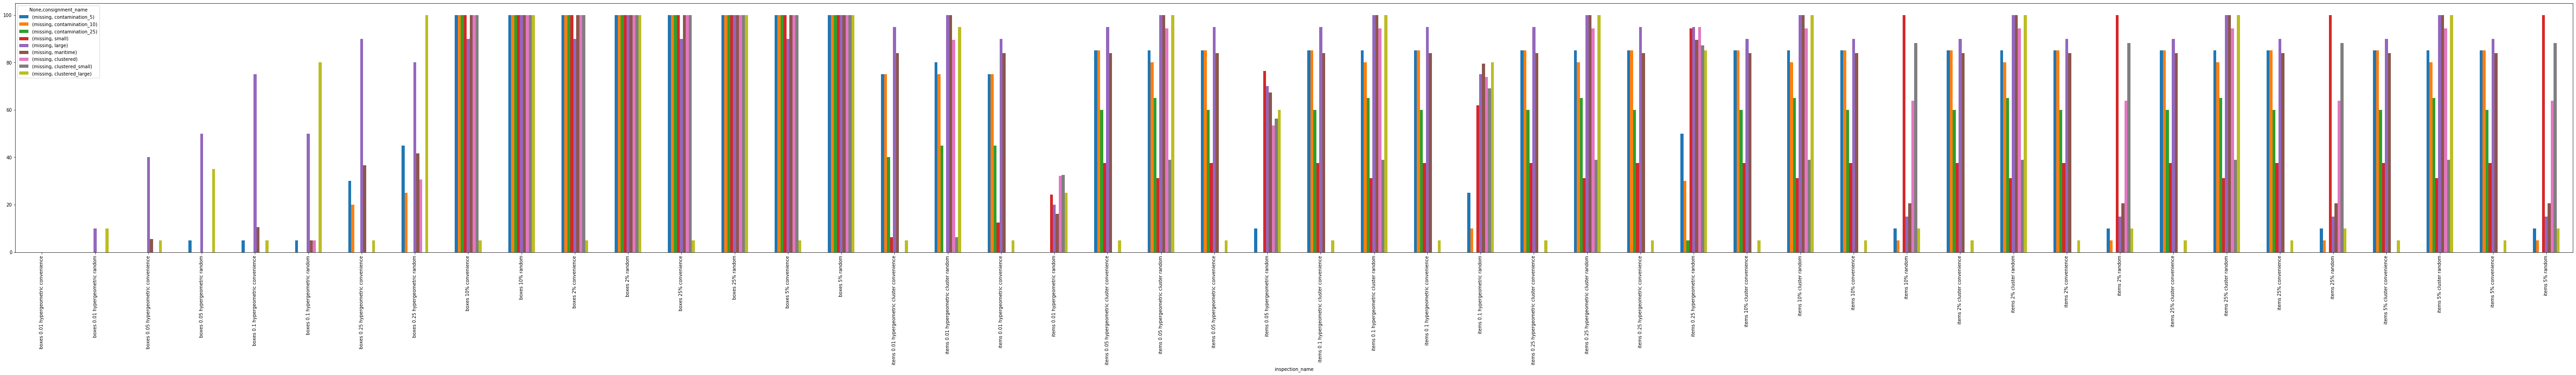

In [13]:
ax = inspections_vs_consignments.plot(kind="bar", figsize=(100, 10))
#ax.figure.savefig("inspections_vs_consignments_bar.png")

In [14]:
from itertools import cycle, islice

it = cycle(list(range(1,49)))
df['inspection_num'] = list(islice(it, len(df)))

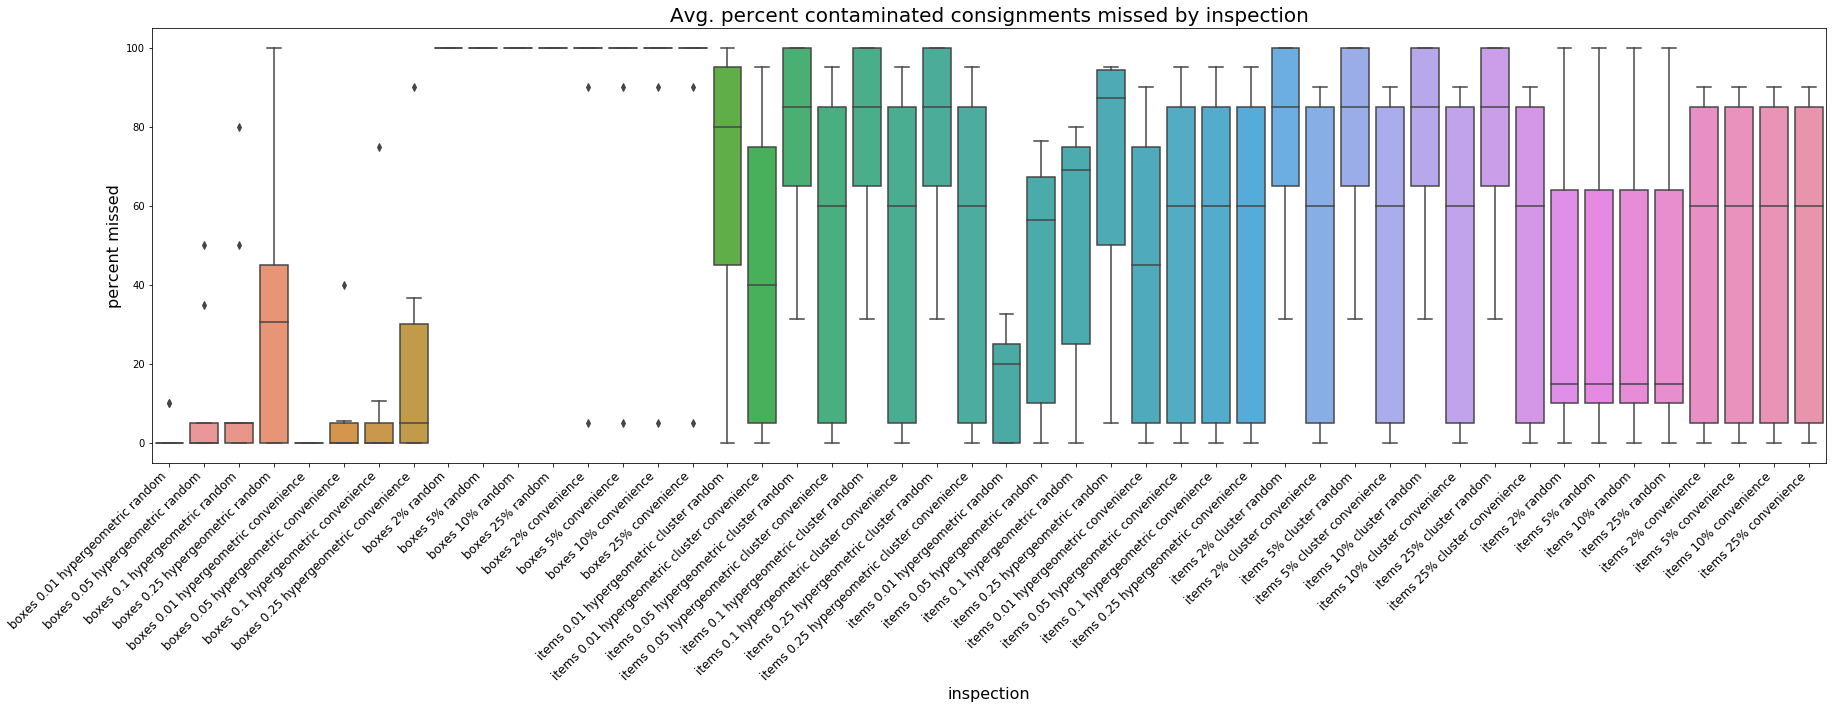

In [15]:
plt.figure(figsize=(30, 8))
sns.boxplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent contaminated consignments missed by inspection", size=20)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

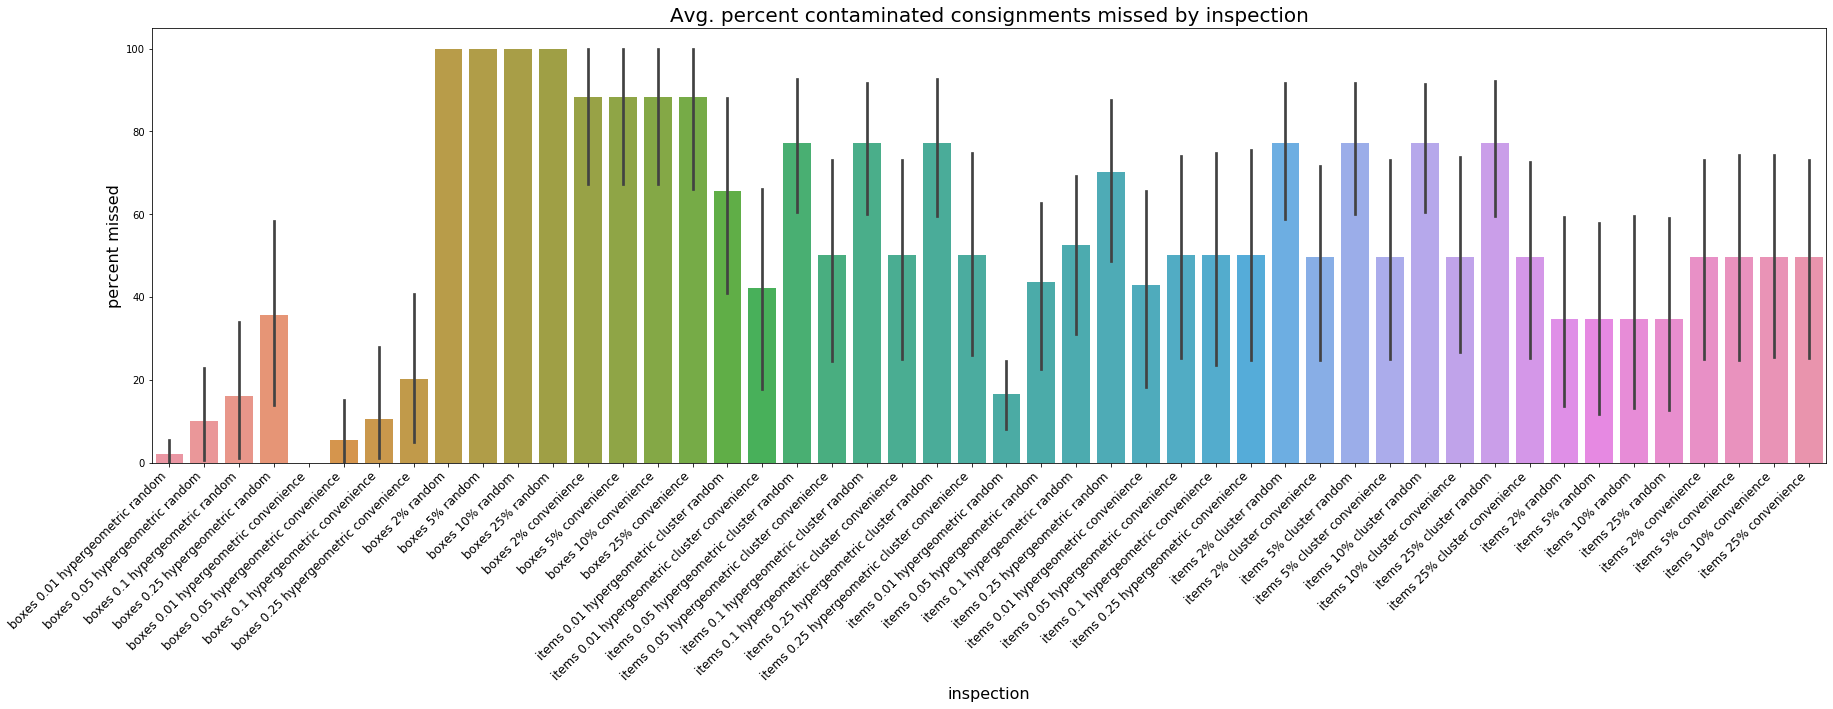

In [16]:
plt.figure(figsize=(30, 8))
sns.barplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent contaminated consignments missed by inspection", size=20)
plt.savefig("missed_by_inspection.png", bbox_inches = "tight")

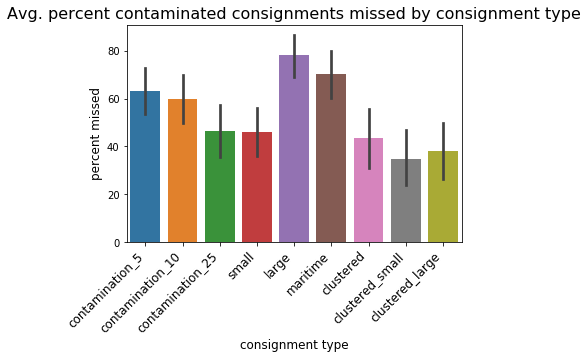

In [17]:
sns.barplot(x="consignment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg. percent contaminated consignments missed by consignment type", size=16)
plt.savefig("missed_by_consignment.png", bbox_inches = "tight")

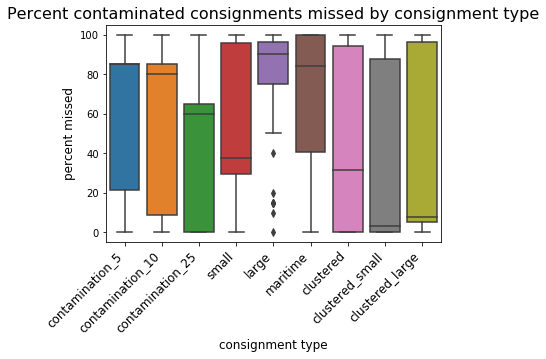

In [18]:
sns.boxplot(x="consignment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type", size=16)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

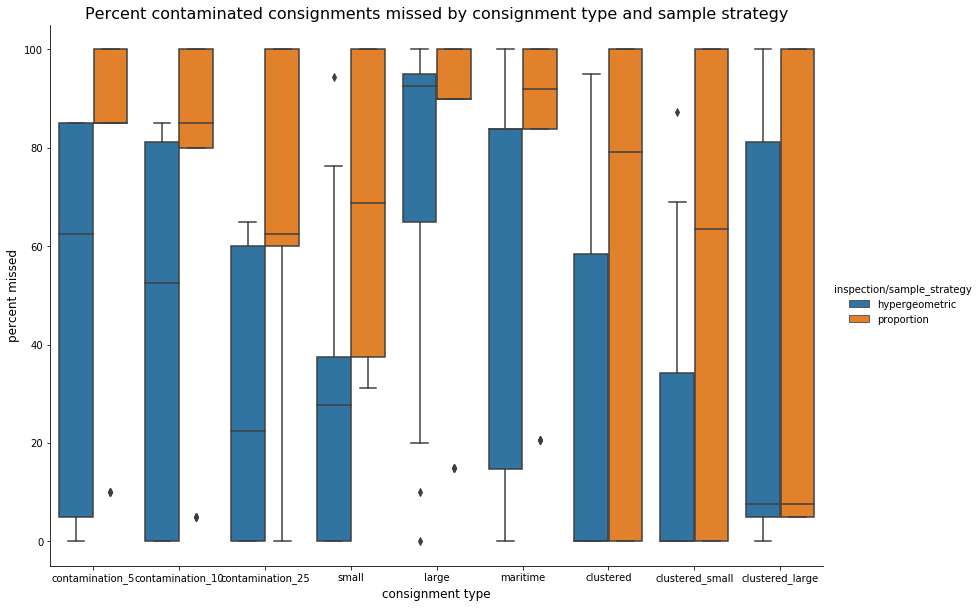

In [19]:
sns.catplot(x="consignment_name", y="missing", hue="inspection/sample_strategy", kind="box", data=df, height=8.27, aspect=11.7/8.27)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and sample strategy", size=16)
plt.savefig("missed_by_consignment_sample_strategy.png", bbox_inches = "tight")

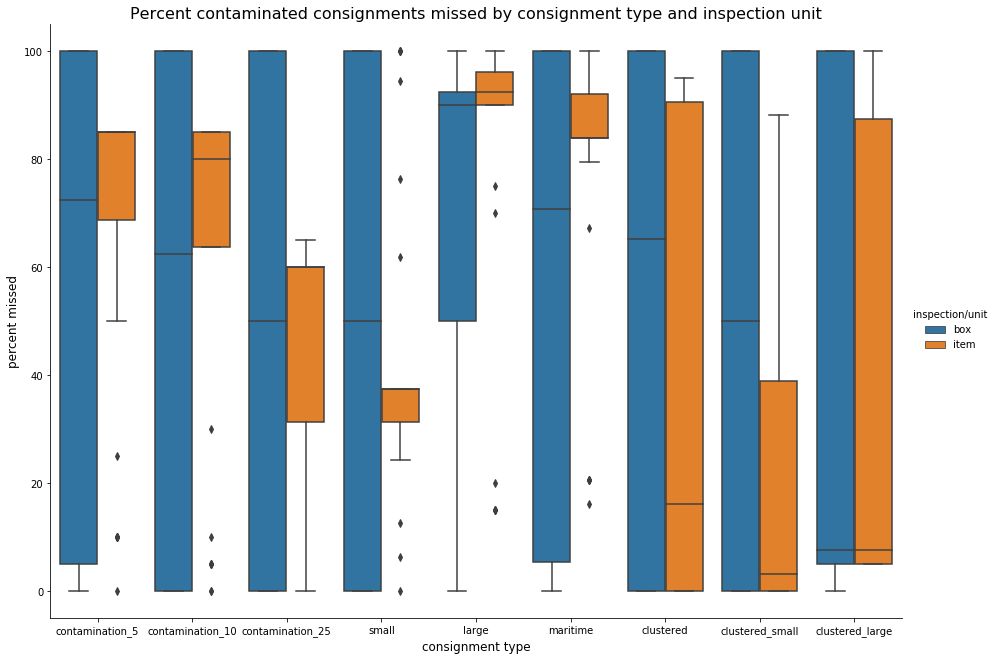

In [20]:
sns.catplot(x="consignment_name", y="missing", hue="inspection/unit", kind="box", data=df, height=9, aspect=11.7/8.27)
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and inspection unit", size=16)
plt.savefig("missed_by_consignment_unit.png", bbox_inches = "tight")

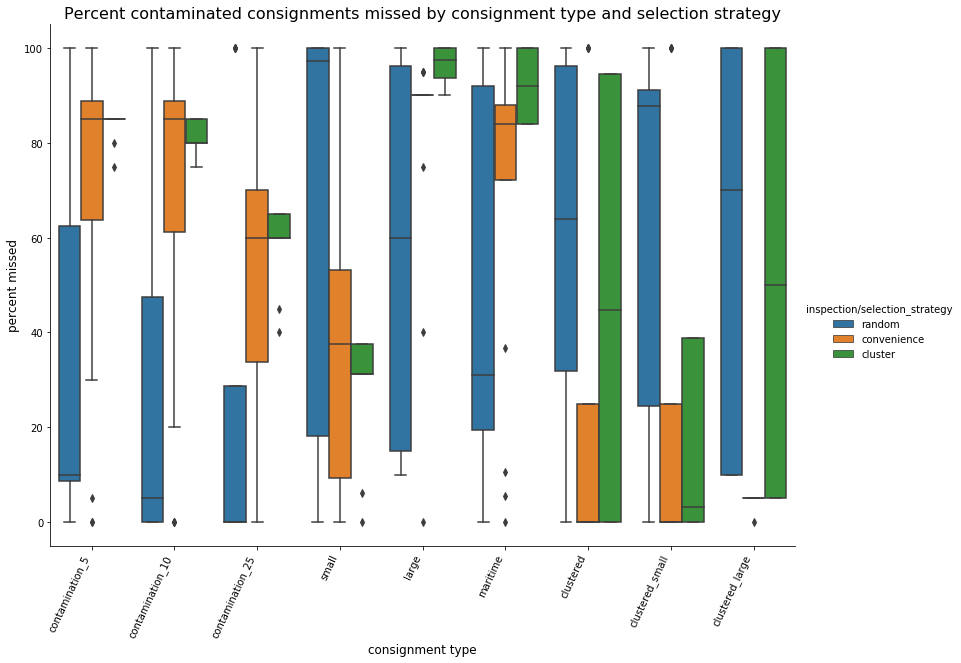

In [21]:
chart = sns.catplot(x="consignment_name", y="missing", hue="inspection/selection_strategy", aspect=11.7/8.27,
            kind="box", data=df, height=8)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel("consignment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent contaminated consignments missed by consignment type and selection strategy", size=16)
chart.savefig("missed_by_consignment_selection.png", bbox_inches = "tight")

In [22]:
inspections_vs_consignments

missing  \
consignment_name                              contamination_5    
inspection_name                                                  
boxes 0.01 hypergeometric convenience                      0.0   
boxes 0.01 hypergeometric random                           0.0   
boxes 0.05 hypergeometric convenience                      0.0   
boxes 0.05 hypergeometric random                           5.0   
boxes 0.1 hypergeometric convenience                       5.0   
boxes 0.1 hypergeometric random                            5.0   
boxes 0.25 hypergeometric convenience                     30.0   
boxes 0.25 hypergeometric random                          45.0   
boxes 10% convenience                                    100.0   
boxes 10% random                                         100.0   
boxes 2% convenience                                     100.0   
boxes 2% random                                          100.0   
boxes 25% convenience                                    100.0   
boxes 25% random                                         100.0   
boxes 5% convenience                                     100.0   
boxes 5% random                                          100.0   
items 0.01 hypergeometric cluster convenience             75.0   
items 0.01 hypergeometric cluster random                  80.0   
items 0.01 hypergeometric convenience                     75.0   
items 0.01 hypergeometric random                           0.0   
items 0.05 hypergeometric cluster convenience             85.0   
items 0.05 hypergeometric cluster random                  85.0   
items 0.05 hypergeometric convenience                     85.0   
items 0.05 hypergeometric random                          10.0   
items 0.1 hypergeometric cluster convenience              85.0   
items 0.1 hypergeometric cluster random                   85.0   
items 0.1 hypergeometric convenience                      85.0   
items 0.1 hypergeometric random                           25.0   
items 0.25 hypergeometric cluster convenience             85.0   
items 0.25 hypergeometric cluster random                  85.0   
items 0.25 hypergeometric convenience                     85.0   
items 0.25 hypergeometric random                          50.0   
items 10% cluster convenience                             85.0   
items 10% cluster random                                  85.0   
items 10% convenience                                     85.0   
items 10% random                                          10.0   
items 2% cluster convenience                              85.0   
items 2% cluster random                                   85.0   
items 2% convenience                                      85.0   
items 2% random                                           10.0   
items 25% cluster convenience                             85.0   
items 25% cluster random                                  85.0   
items 25% convenience                                     85.0   
items 25% random                                          10.0   
items 5% cluster convenience                              85.0   
items 5% cluster random                                   85.0   
items 5% convenience                                      85.0   
items 5% random                                           10.0   

                                                                \
consignment_name                              contamination_10   
inspection_name                                                  
boxes 0.01 hypergeometric convenience                      0.0   
boxes 0.01 hypergeometric random                           0.0   
boxes 0.05 hypergeometric convenience                      0.0   
boxes 0.05 hypergeometric random                           0.0   
boxes 0.1 hypergeometric convenience                       0.0   
boxes 0.1 hypergeometric random                            0.0   
boxes 0.25 hypergeometric convenience                     20.0   
boxes 0.25 hypergeometric ra

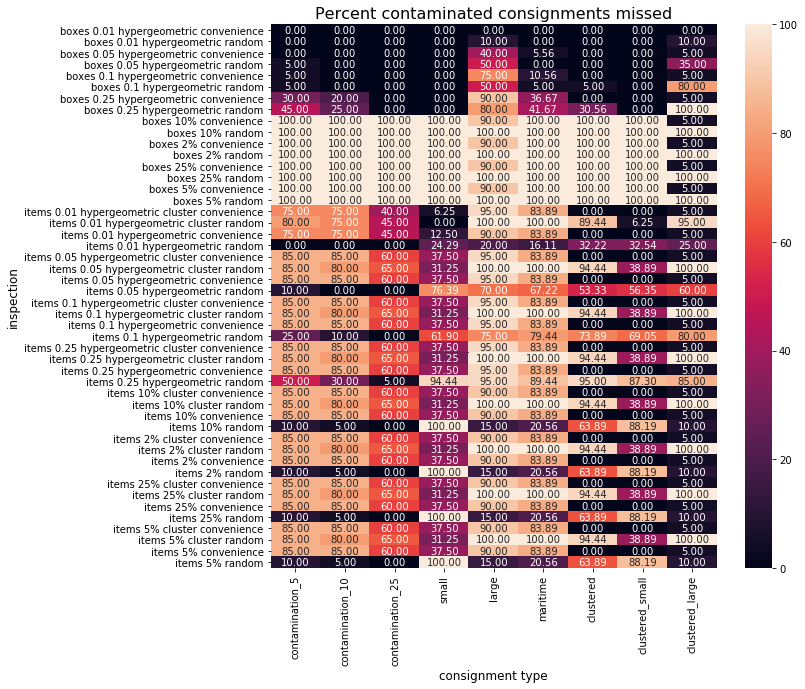

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Percent contaminated consignments missed", size=16)
plt.savefig("heatmap_missed.png", bbox_inches = "tight")

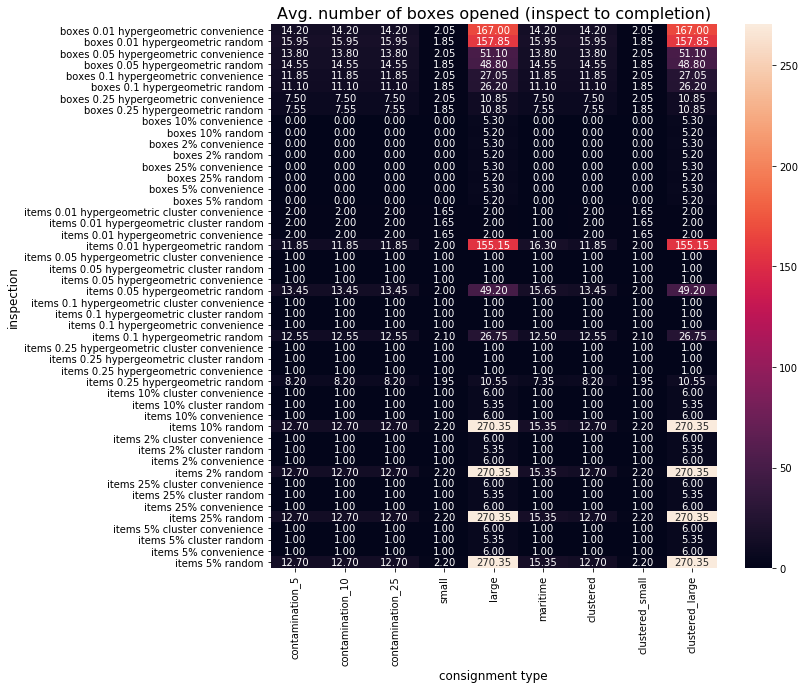

In [24]:
inspections_vs_consignments_boxes_opened = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_boxes_opened_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_boxes_opened, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to completion)", size=16)
plt.savefig("heatmap_boxes_completion.png", bbox_inches = "tight")

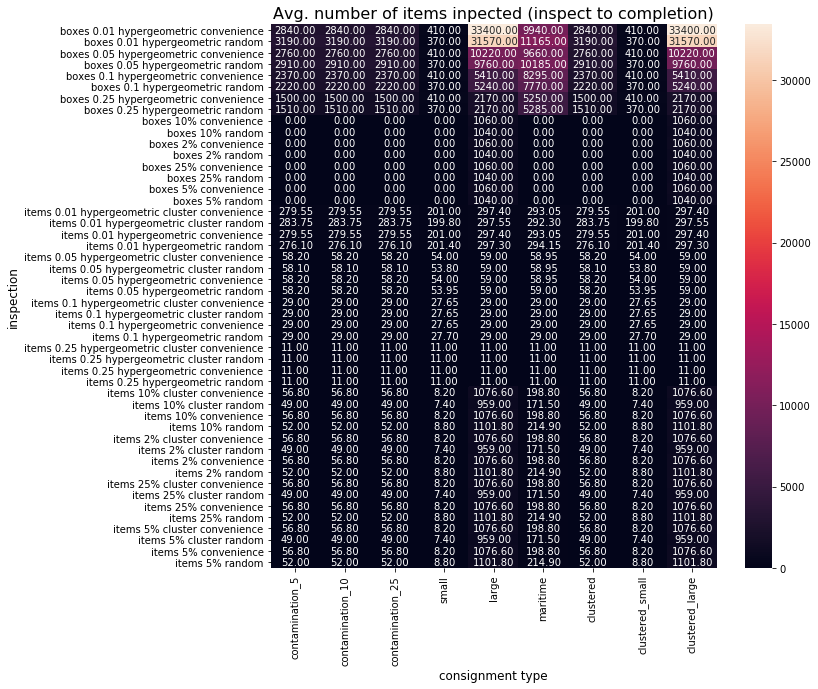

In [25]:
inspections_vs_consignments_items_inspected = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_items_inspected_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_items_inspected, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of items inpected (inspect to completion)", size=16)
plt.savefig("heatmap_items_completion.png", bbox_inches = "tight")

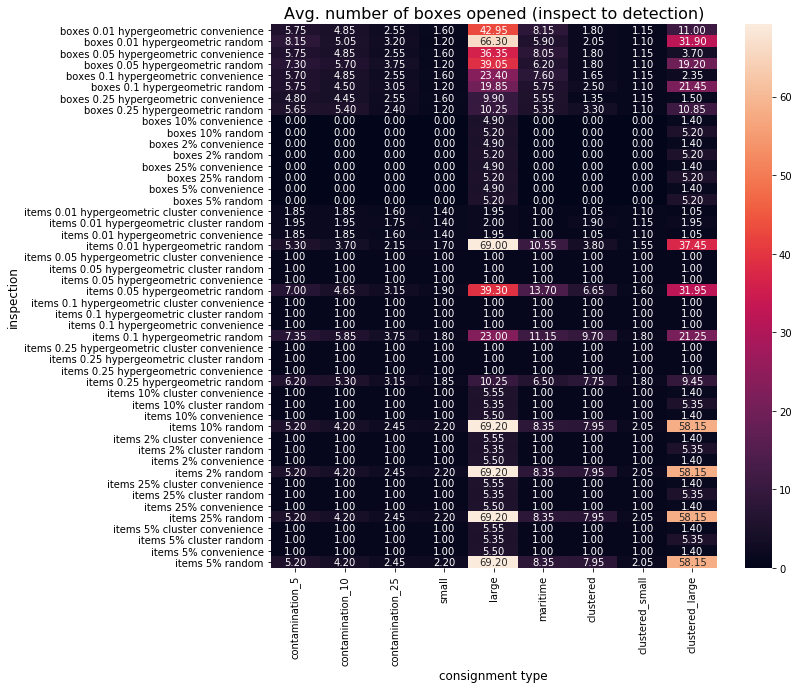

In [26]:
inspections_vs_consignments_boxes_opened_detection = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_boxes_opened_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_boxes_opened_detection, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to detection)", size=16)
plt.savefig("heatmap_boxes_detection.png", bbox_inches = "tight")

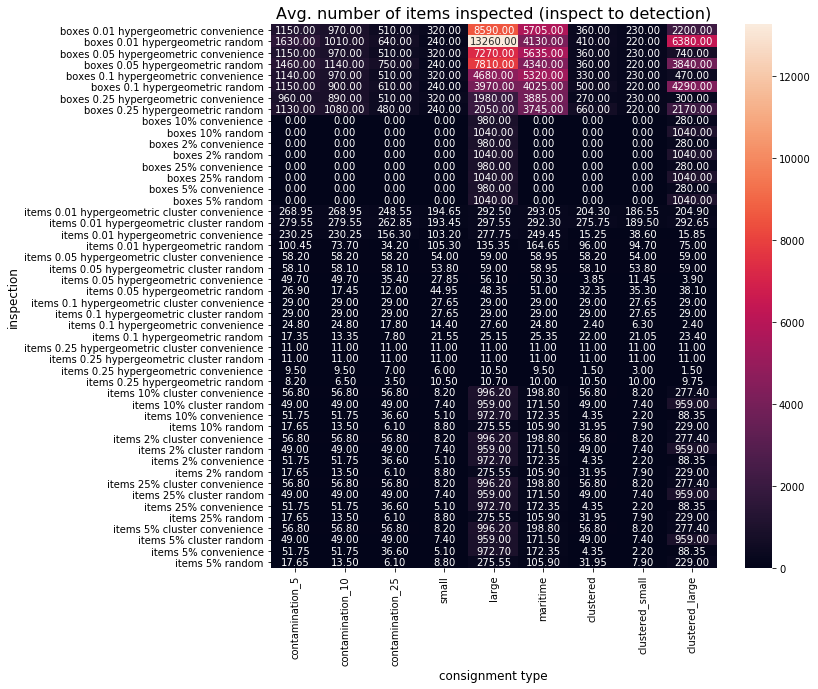

In [27]:
inspections_vs_consignments_items_inspected_detection = df.pivot_table(index=["inspection_name"], columns=["consignment_name"], values=["avg_items_inspected_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_consignments_items_inspected_detection, annot=True, fmt=".2f", xticklabels = consignment_order)
plt.xlabel("consignment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of items inspected (inspect to detection)", size=16)
plt.savefig("heatmap_items_detection.png", bbox_inches = "tight")

In [28]:
df_norm = df[["missing",
        "true_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "pct_items_inspected_detection",
        "pct_contaminant_unreported_if_detection"]]
df_norm

,missing,true_contamination_rate,max_intercepted_contamination_rate,avg_intercepted_contamination_rate,avg_boxes_opened_completion,avg_boxes_opened_detection,avg_items_inspected_completion,avg_items_inspected_detection,pct_items_inspected_detection,pct_contaminant_unreported_if_detection
0,0.000000,0.007169,0.018177,0.007520,15.95,2.05,3190.0,410.0,12.959031,0.00000
1,0.000000,0.007184,0.018242,0.007540,14.55,1.80,2910.0,360.0,12.645243,0.00000
2,5.000000,0.007217,0.018186,0.007436,11.10,2.50,2220.0,500.0,19.696030,0.00000
3,30.555556,0.007112,0.017649,0.006498,7.55,3.30,1510.0,660.0,24.203297,0.00000
4,0.000000,0.007144,0.018095,0.007498,14.20,1.80,2840.0,360.0,12.176101,0.00000
...,...,...,...,...,...,...,...,...,...,...
427,100.000000,0.007417,NaN,NaN,2.20,2.20,8.8,8.8,2.000000,0.00000
428,37.500000,0.007833,0.016250,0.007917,1.00,1.00,8.2,5.1,1.236905,60.25641
429,37.500000,0.007833,0.016250,0.007917,1.00,1.00,8.2,5.1,1.236905,60.25641
430,37.500000,0.007833,0.016250,0.007917,1.00,1.00,8.2,5.1,1.236905,60.25641


In [29]:
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm

,missing,true_contamination_rate,max_intercepted_contamination_rate,avg_intercepted_contamination_rate,avg_boxes_opened_completion,avg_boxes_opened_detection,avg_items_inspected_completion,avg_items_inspected_detection,pct_items_inspected_detection,pct_contaminant_unreported_if_detection
0,0.000000,0.001488,0.047963,0.011717,0.058998,0.029624,0.095509,0.030920,0.166446,0.000000
1,0.000000,0.001545,0.048191,0.011795,0.053819,0.026012,0.087126,0.027149,0.162416,0.000000
2,0.050000,0.001677,0.047996,0.011388,0.041058,0.036127,0.066467,0.037707,0.252977,0.000000
3,0.305556,0.001262,0.046111,0.007733,0.027927,0.047688,0.045210,0.049774,0.310868,0.000000
4,0.000000,0.001390,0.047676,0.011629,0.052525,0.026012,0.085030,0.027149,0.156390,0.000000
...,...,...,...,...,...,...,...,...,...,...
427,1.000000,0.002462,NaN,NaN,0.008138,0.031792,0.000263,0.000664,0.025688,0.000000
428,0.375000,0.004104,0.041199,0.013262,0.003699,0.014451,0.000246,0.000385,0.015887,0.603997
429,0.375000,0.004104,0.041199,0.013262,0.003699,0.014451,0.000246,0.000385,0.015887,0.603997
430,0.375000,0.004104,0.041199,0.013262,0.003699,0.014451,0.000246,0.000385,0.015887,0.603997


In [30]:
df_norm["name"], df_norm["inspection_num"], df_norm["inspection_name"], df_norm["consignment_name"] = df["name"], df["inspection_num"], df["inspection_name"], df["consignment_name"]
df_norm

,missing,true_contamination_rate,max_intercepted_contamination_rate,avg_intercepted_contamination_rate,avg_boxes_opened_completion,avg_boxes_opened_detection,avg_items_inspected_completion,avg_items_inspected_detection,pct_items_inspected_detection,pct_contaminant_unreported_if_detection,name,inspection_num,inspection_name,consignment_name
0,0.000000,0.001488,0.047963,0.011717,0.058998,0.029624,0.095509,0.030920,0.166446,0.000000,clustered_10,1,boxes 0.01 hypergeometric random,clustered
1,0.000000,0.001545,0.048191,0.011795,0.053819,0.026012,0.087126,0.027149,0.162416,0.000000,clustered_12,2,boxes 0.05 hypergeometric random,clustered
2,0.050000,0.001677,0.047996,0.011388,0.041058,0.036127,0.066467,0.037707,0.252977,0.000000,clustered_14,3,boxes 0.1 hypergeometric random,clustered
3,0.305556,0.001262,0.046111,0.007733,0.027927,0.047688,0.045210,0.049774,0.310868,0.000000,clustered_16,4,boxes 0.25 hypergeometric random,clustered
4,0.000000,0.001390,0.047676,0.011629,0.052525,0.026012,0.085030,0.027149,0.156390,0.000000,clustered_09,5,boxes 0.01 hypergeometric convenience,clustered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1.000000,0.002462,NaN,NaN,0.008138,0.031792,0.000263,0.000664,0.025688,0.000000,small_30,44,items 25% random,small
428,0.375000,0.004104,0.041199,0.013262,0.003699,0.014451,0.000246,0.000385,0.015887,0.603997,small_17,45,items 2% convenience,small
429,0.375000,0.004104,0.041199,0.013262,0.003699,0.014451,0.000246,0.000385,0.015887,0.603997,small_21,46,items 5% convenience,small
430,0.375000,0.004104,0.041199,0.013262,0.003699,0.014451,0.000246,0.000385,0.015887,0.603997,small_25,47,items 10% convenience,small


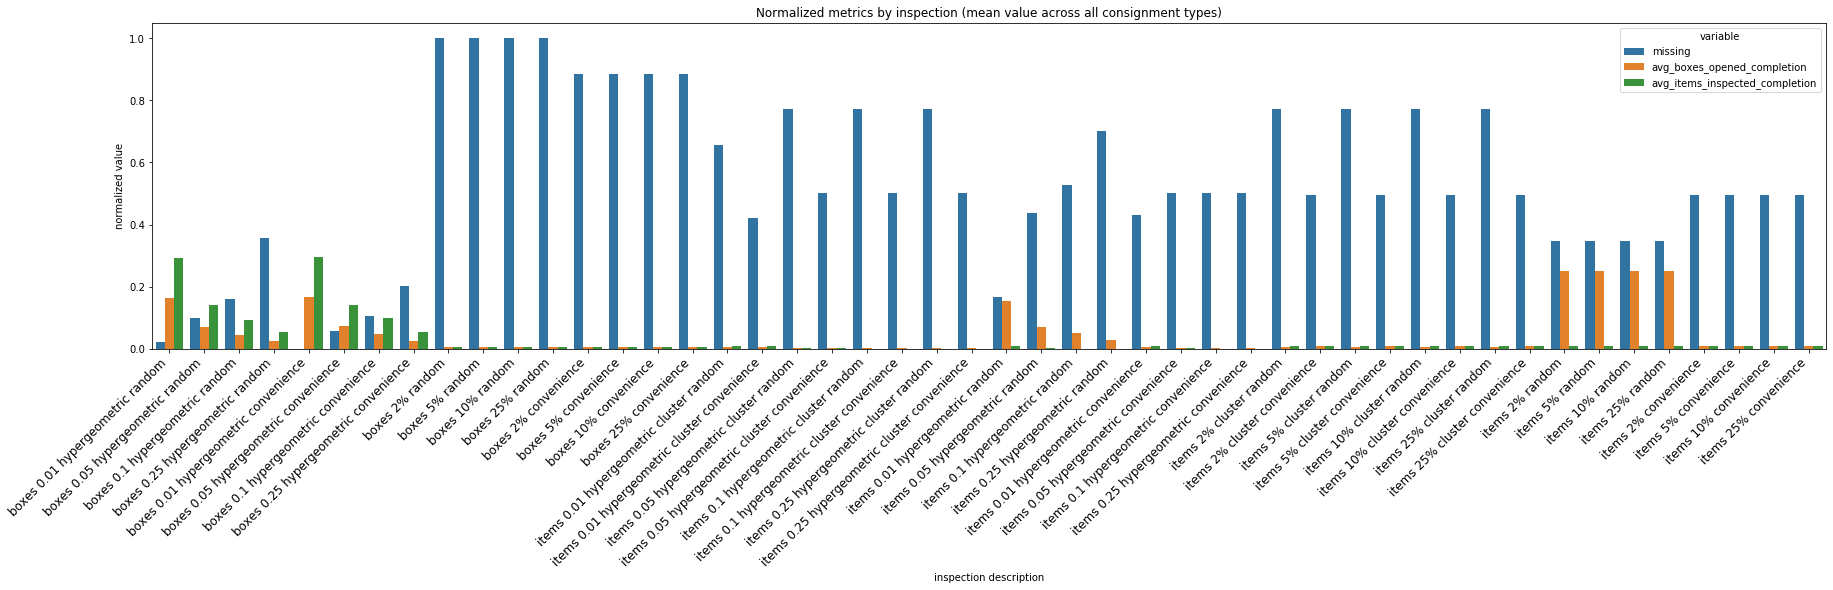

In [31]:
df_norm_melted = pd.melt(df_norm, id_vars=["inspection_num", "inspection_name", "consignment_name"], value_vars=["missing", "avg_boxes_opened_completion", "avg_items_inspected_completion"])
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted, ax=ax1, ci = None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (mean value across all consignment types)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_all.png", bbox_inches = "tight")

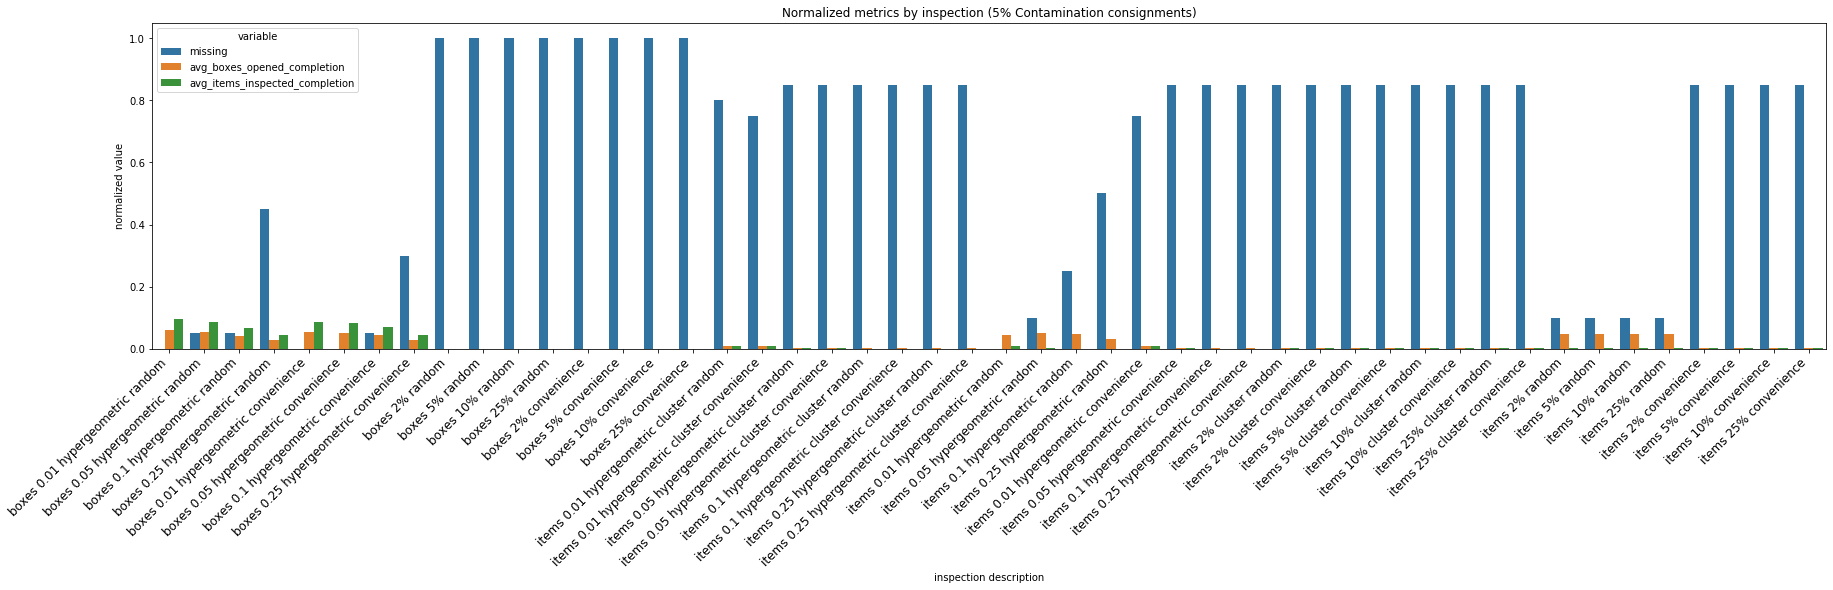

In [32]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_5")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (5% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_5.png", bbox_inches = "tight")

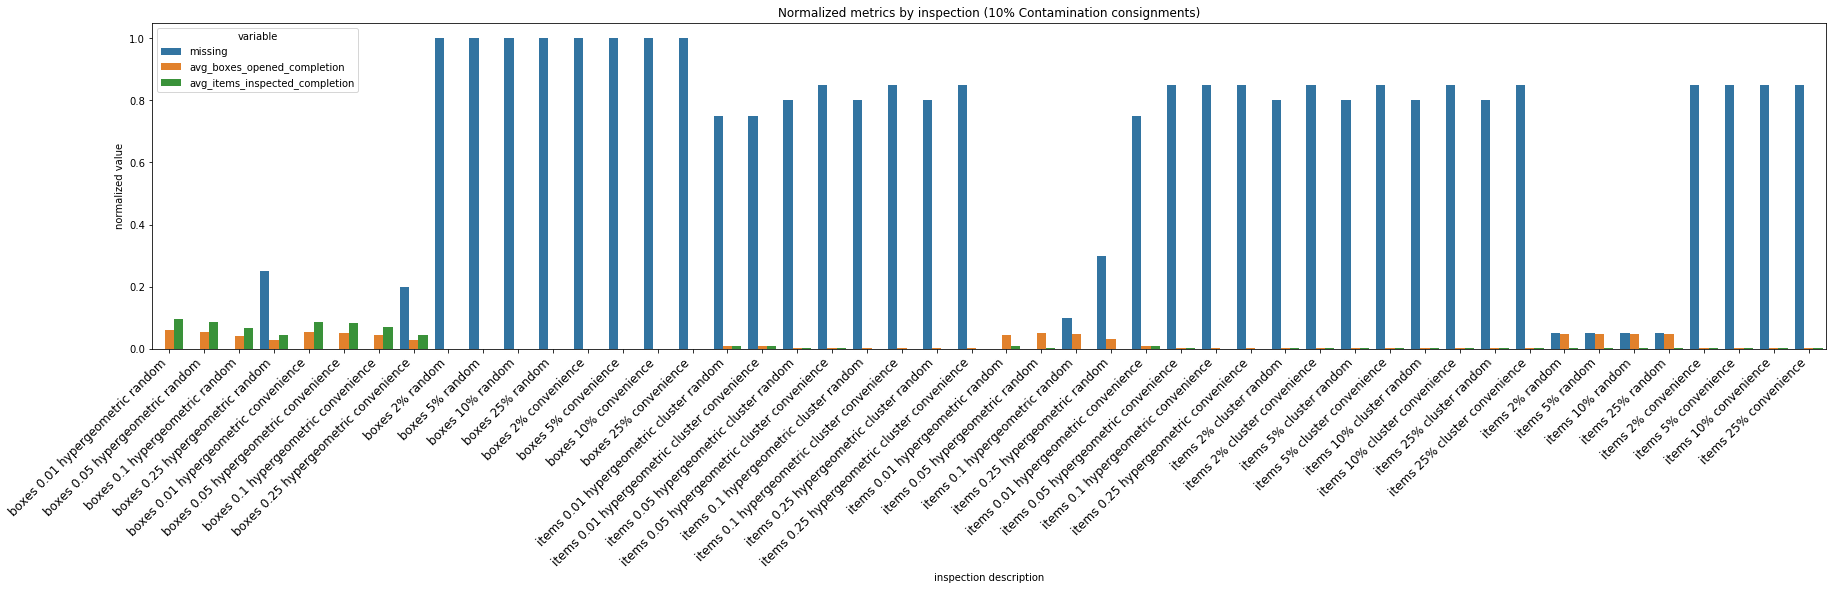

In [33]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_10")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (10% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_10.png", bbox_inches = "tight")

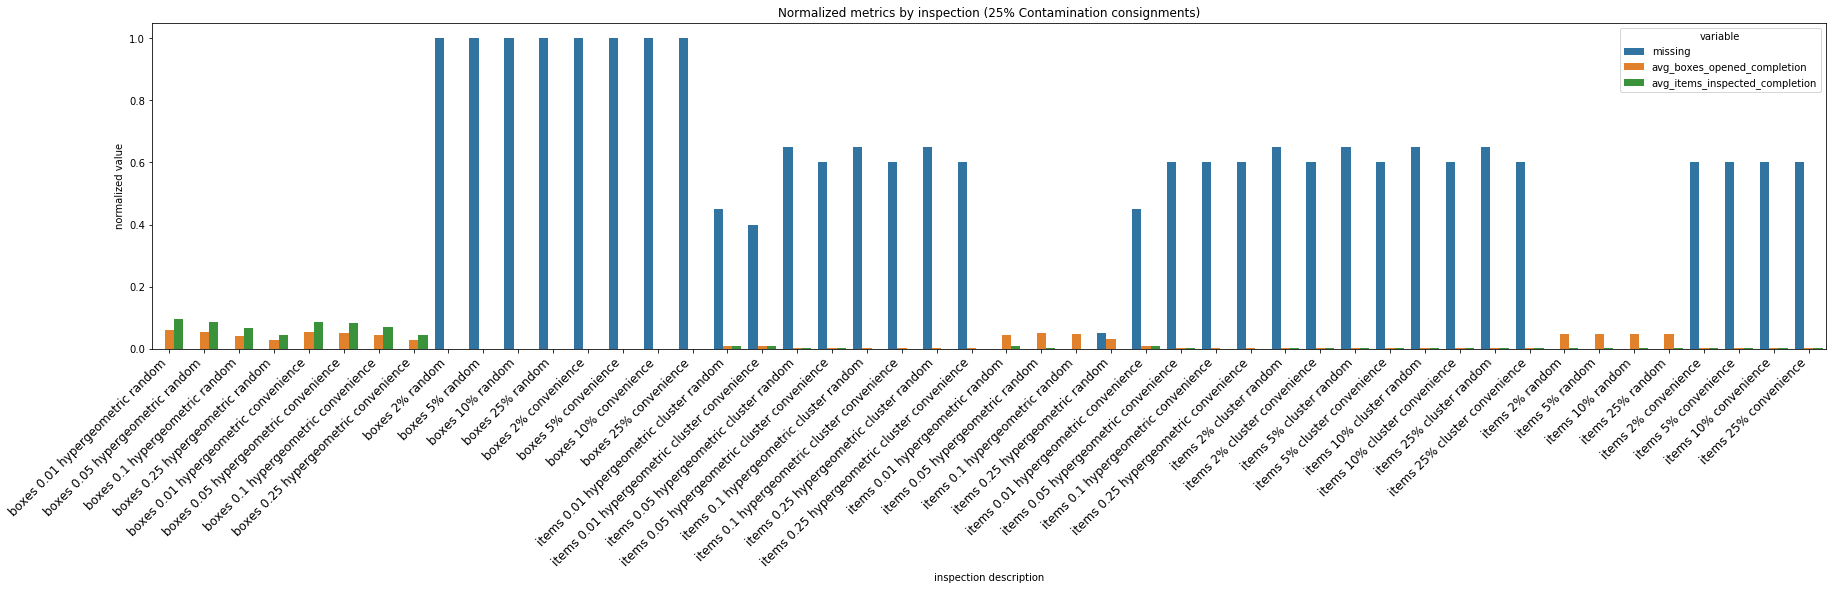

In [34]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("contamination_25")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (25% Contamination consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_contamination_25.png", bbox_inches = "tight")

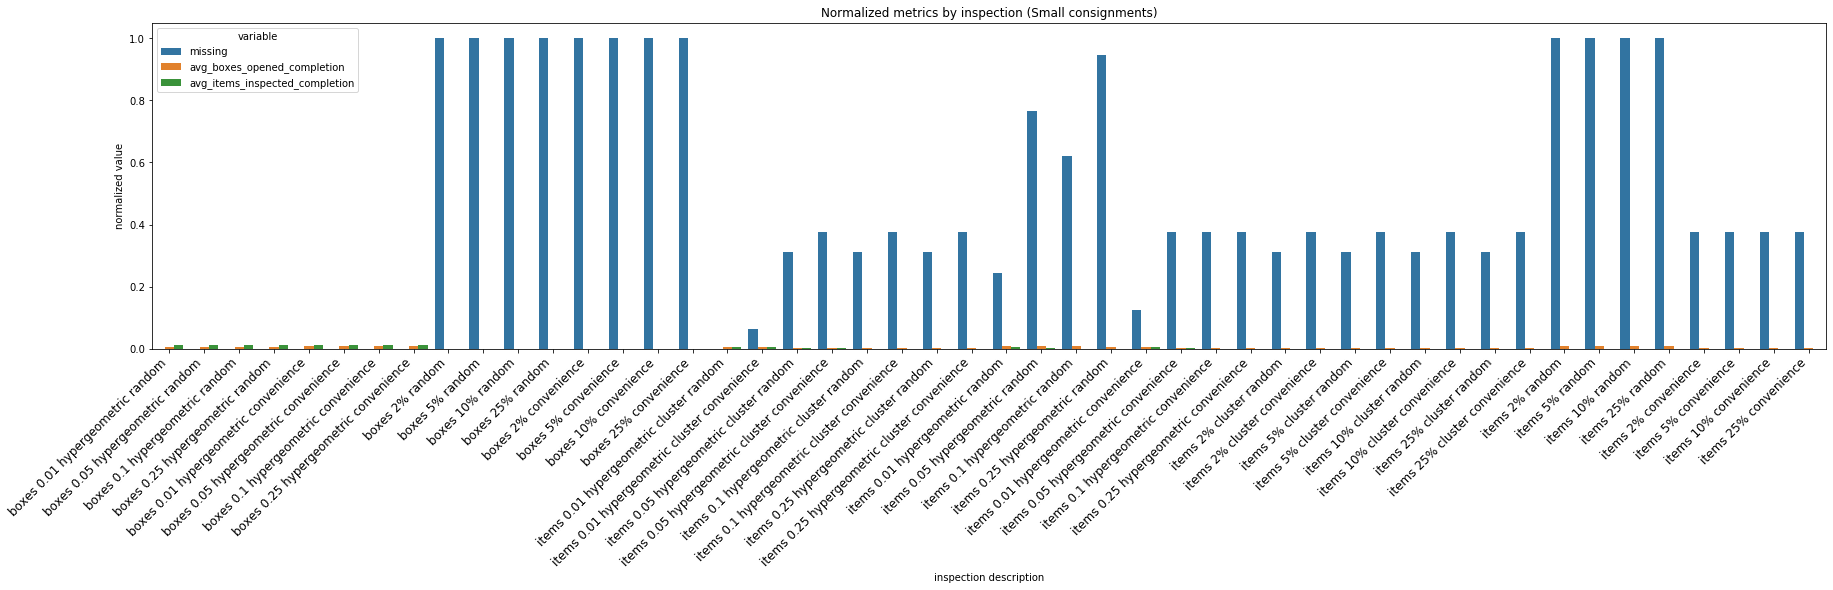

In [35]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Small consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_small.png", bbox_inches = "tight")

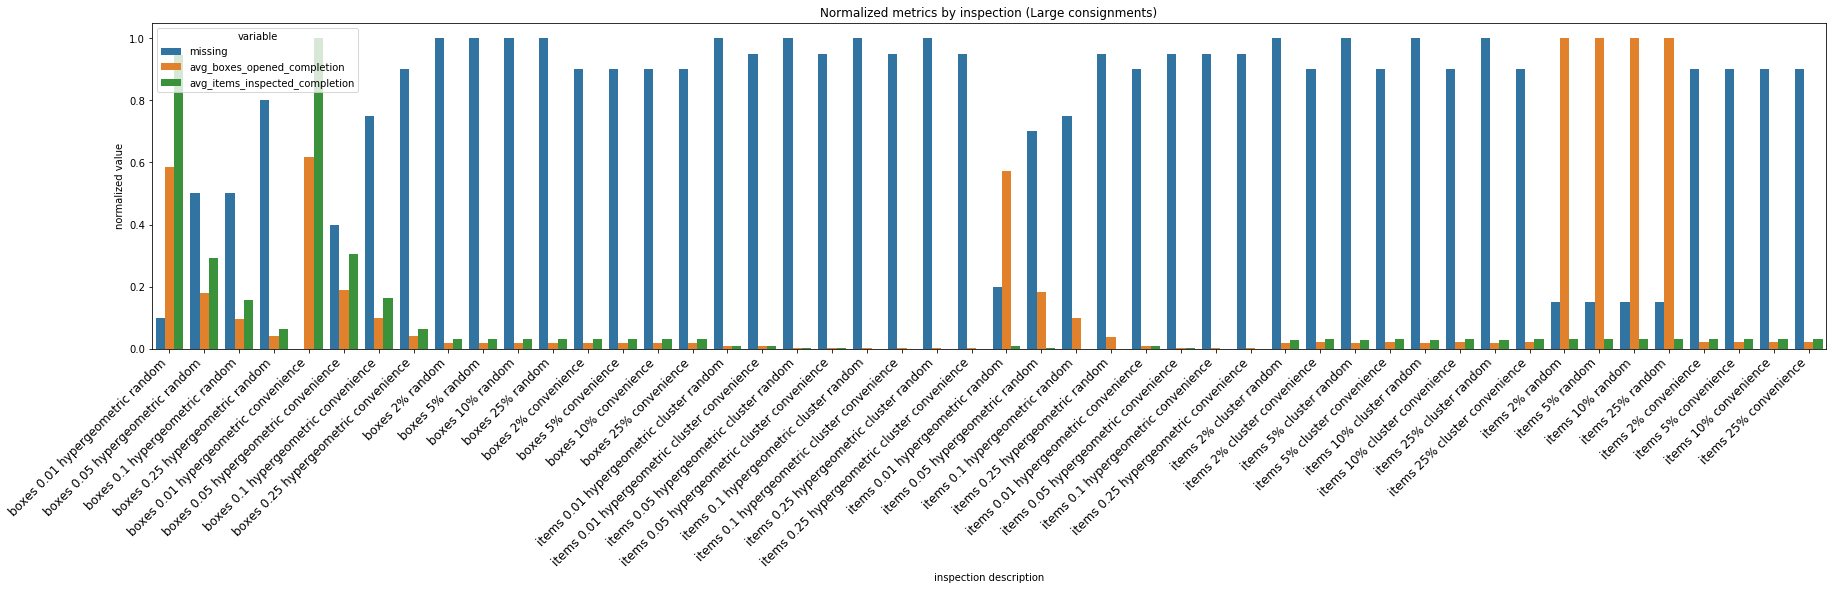

In [36]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Large consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_large.png", bbox_inches = "tight")

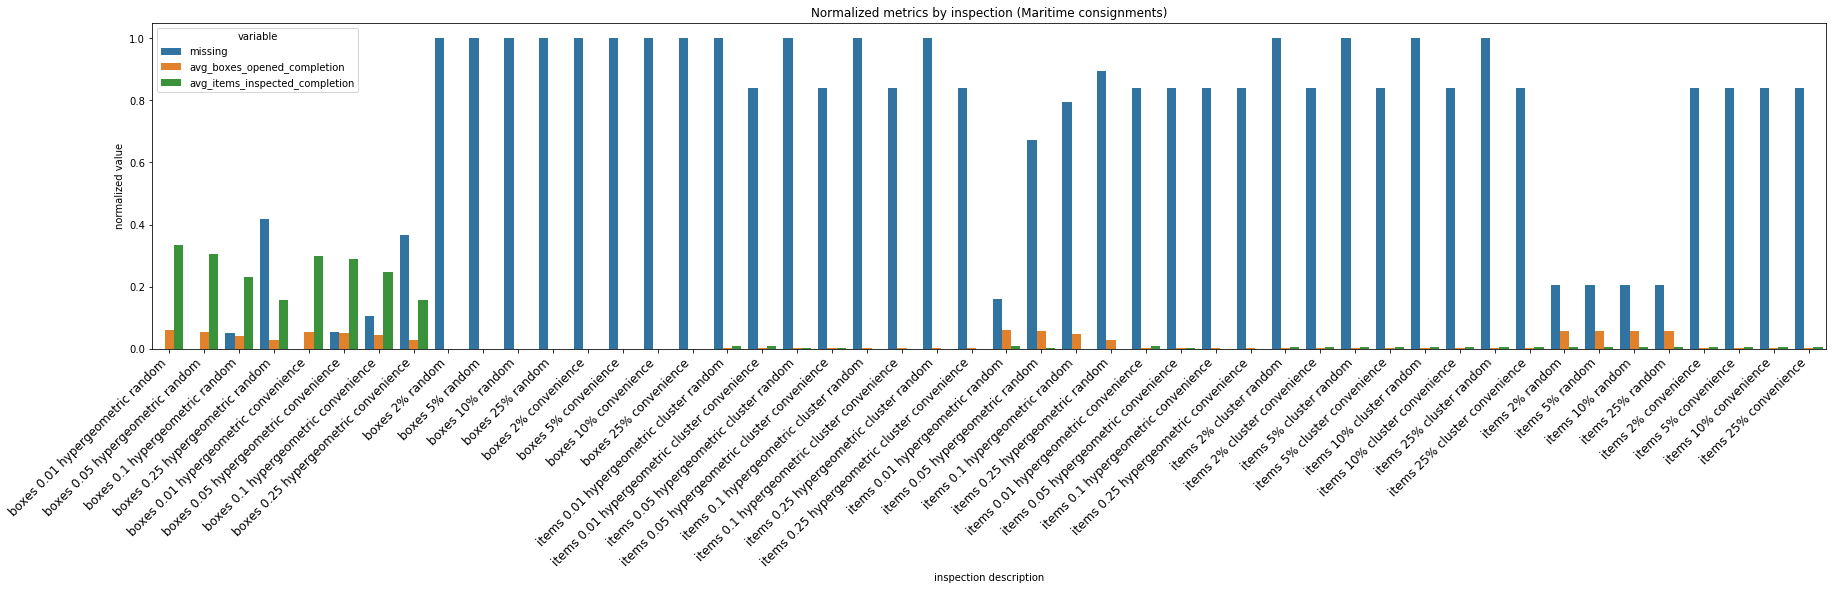

In [37]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("maritime")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Maritime consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_maritime.png", bbox_inches = "tight")

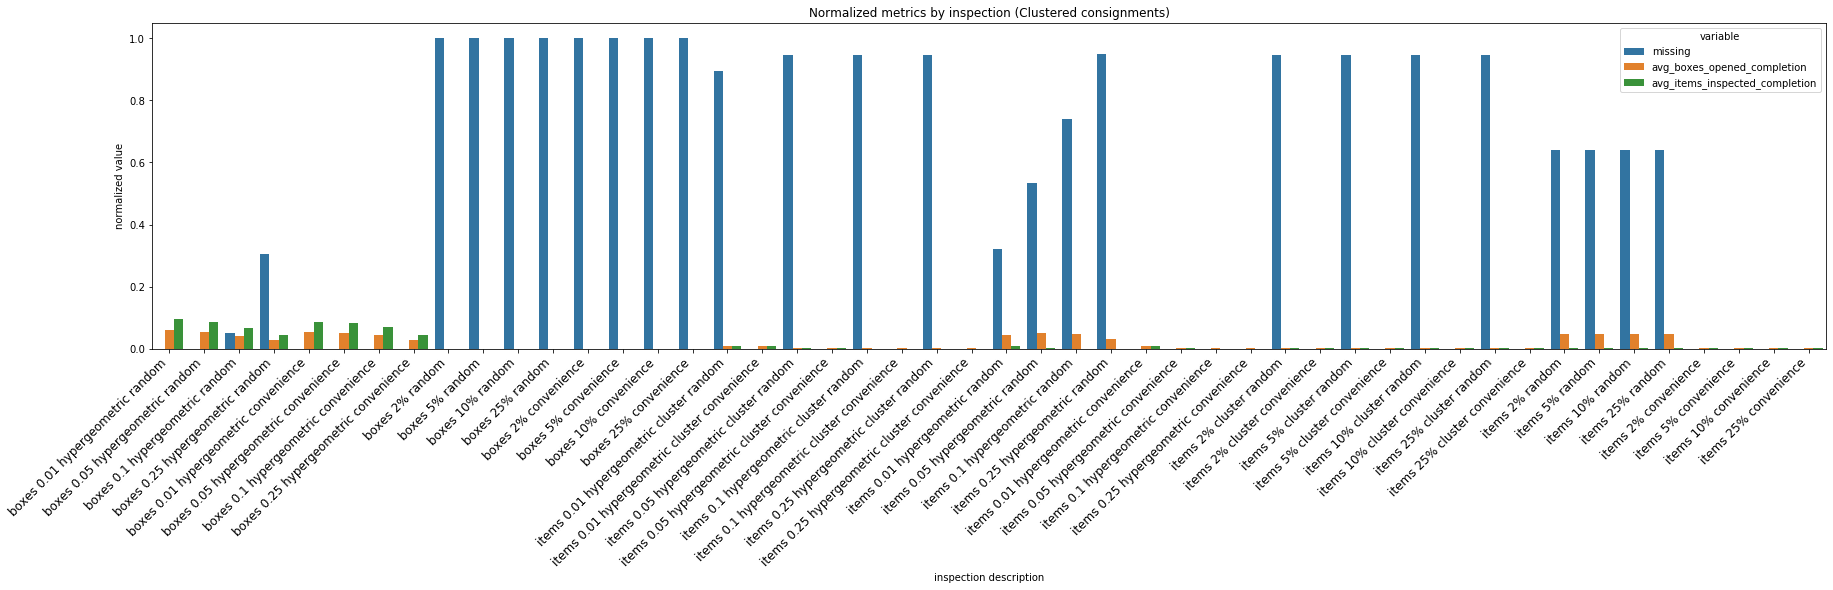

In [38]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered.png", bbox_inches = "tight")

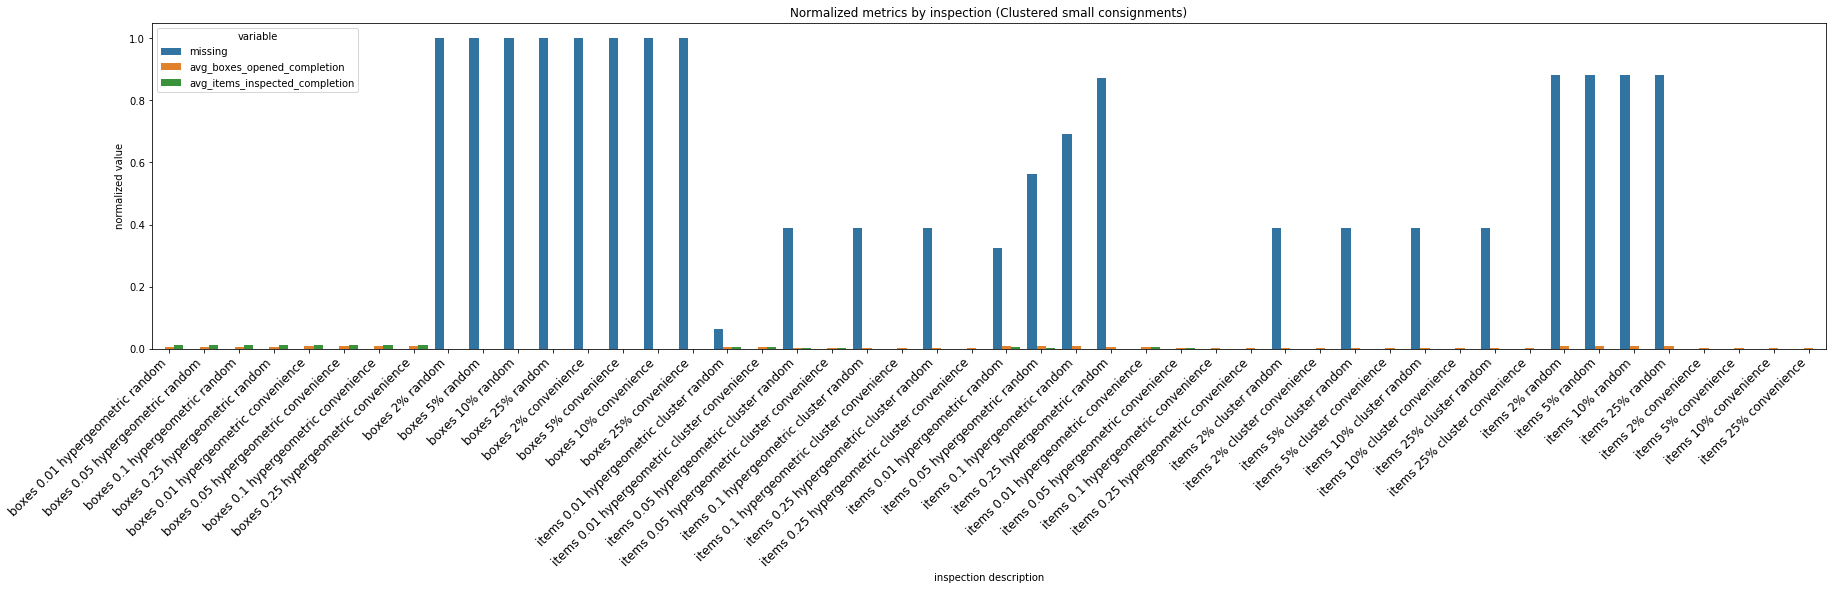

In [39]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered_small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered small consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_small.png", bbox_inches = "tight")

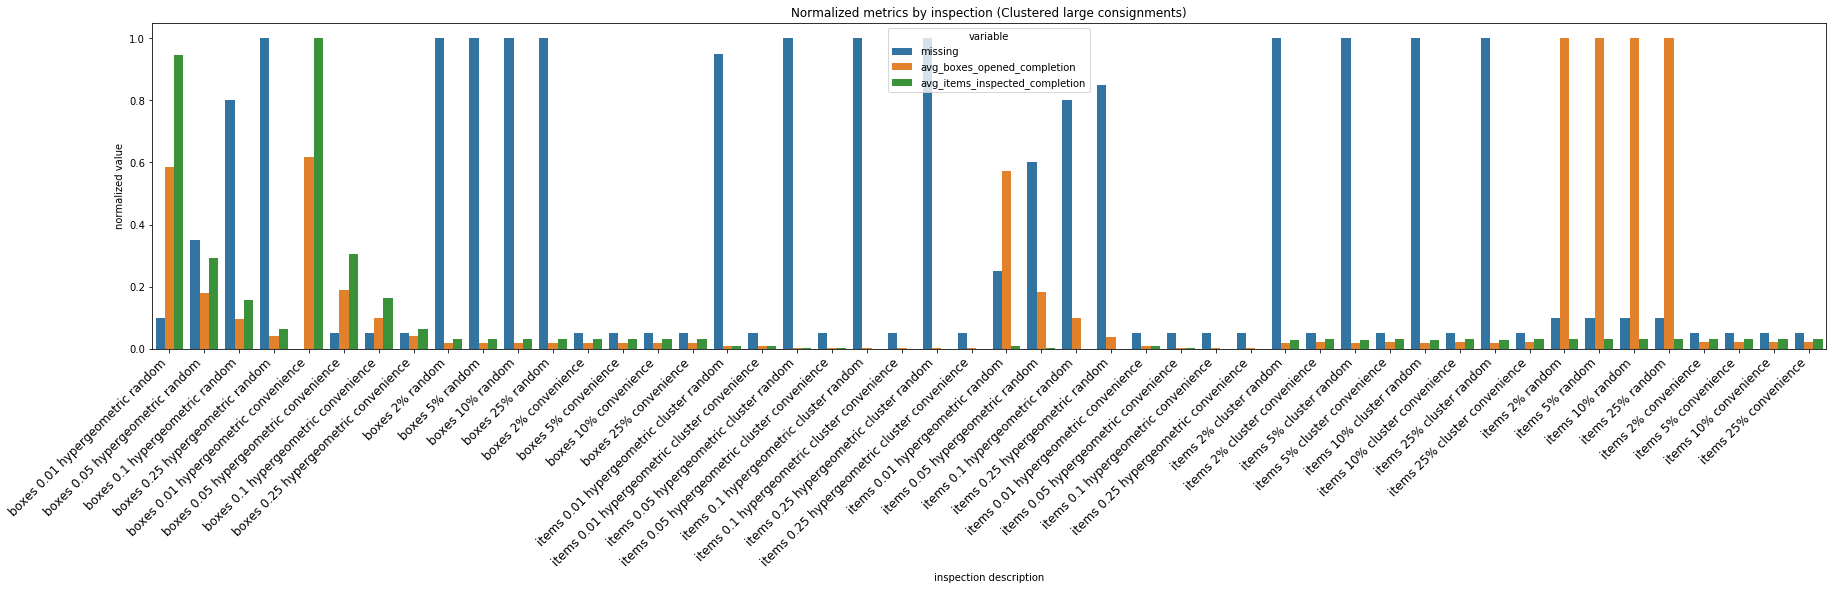

In [40]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.consignment_name.eq("clustered_large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered large consignments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_large.png", bbox_inches = "tight")